In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
#------------------Read Iris Data------------------*

In [3]:
#load iris dataset
iris = datasets.load_iris()

#set X and y
X = iris.data[:,[0,2]]
y = iris.target

iris.data.shape, X.shape, y.shape

((150, 4), (150, 2), (150,))

In [4]:
#------------------Models------------------*

In [5]:
#Decision Trees
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = DecisionTreeClassifier(max_depth=5)
clf3 = DecisionTreeClassifier(max_depth=6)

#Voting Classifier
eclf = VotingClassifier(estimators = [('dt1', clf1), 
                                      ('dt2', clf2), 
                                      ('dt3', clf3)],
                        voting = 'soft',
                        weights = [3, 2, 1])

#Bagging Classifier
eclf1=BaggingClassifier(base_estimator=clf1,n_estimators=30)
eclf2=BaggingClassifier(base_estimator=clf2,n_estimators=30)
eclf3=BaggingClassifier(base_estimator=clf3,n_estimators=30)

In [6]:
#fitting models
clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)
eclf.fit(X,y)
eclf1.fit(X,y)
eclf2.fit(X,y)
eclf3.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                  n_estimators=30)

In [7]:
#------------------Plot Results------------------*

In [8]:
#set grid
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.1), np.arange(y_min, y_max,0.1))

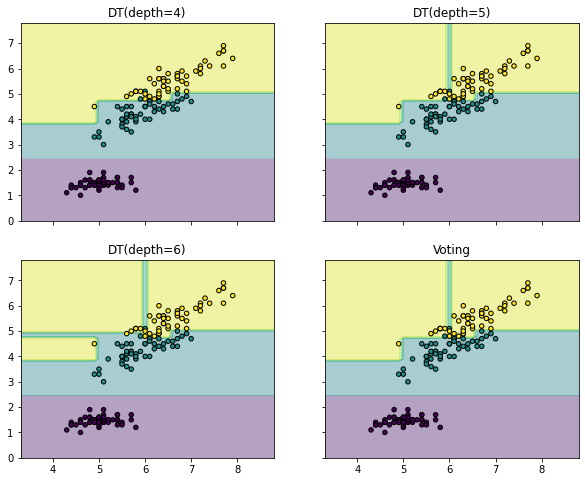

In [9]:
#plot voting classifier results
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize = (10,8))

for idx, clf, tt in zip (product([0,1],[0,1]), [clf1,clf2,clf3,eclf], 
                                 ['DT(depth=4)', 'DT(depth=5)', 'DT(depth=6)','Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

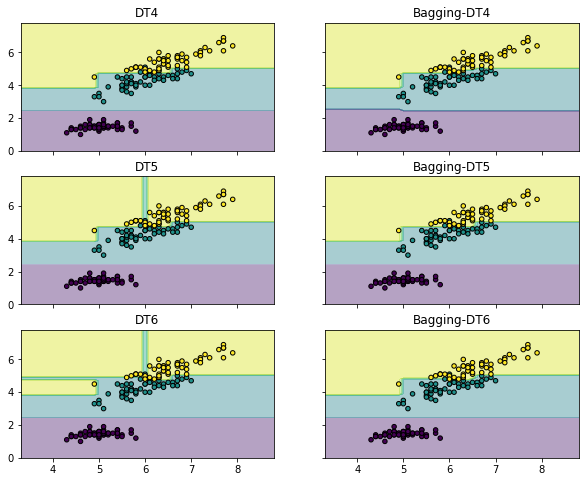

In [10]:
#plot Bagging classifier results
f,axarr=plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10,8))

for idx, clf, tt in zip (product([0,1,2], [0,1]),
                        [clf1, eclf1, clf2, eclf2, clf3, eclf3],
                        ['DT4', 'Bagging-DT4', 'DT5', 'Bagging-DT5', 'DT6', 'Bagging-DT6', 'Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()